In [1]:
import numpy as np
import matplotlib.pyplot as plt
from LoopExtrusionModel.loopExtrusionModel import Genome, Cohesin, Extruder, Simulator

In [2]:
def simulations(i, time, n_extruders=10, per_i=10, option="cohesin"):
    sim = Simulator(Genome(1), i, n_extruders, per_i, option)
    sim.simulate(time)
    sim.plot()
    sim.average_domain()
    return sim.extruders_domains

In [3]:
def sim_per_i(per_i, option):
    all_domains = dict()
    for i in range(1000):
        extruders_domains = simulations(i, time=1000, per_i=per_i, option=option)
        for key in extruders_domains:
            if all_domains.get(key) is None:
                all_domains[key] = extruders_domains[key]
            else:
                all_domains[key].extend(extruders_domains[key])
    plt.show()
    print([(k ,np.mean(x)) for k, x in all_domains.items()])
    if not all_domains:
        pass
    else:
        labels, data = [*zip(*all_domains.items())]
        plt.boxplot(data)
        plt.xticks(range(1, len(labels) + 1), labels)
        plt.show()

In [4]:
def run(option):
    for i in range(1,2):
        sim_per_i(i*10, option)

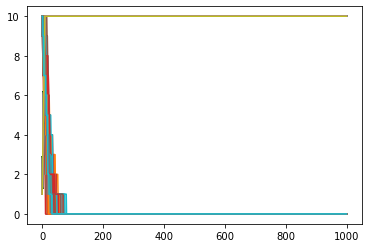

[('Cohesin', 16.9549)]


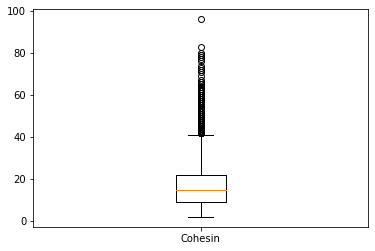

In [5]:
run("cohesin")

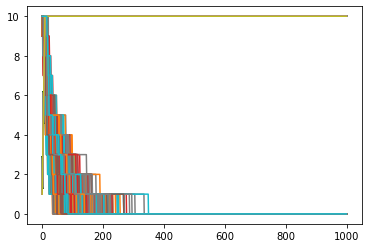

[('Cohesin', 16.6734), ('Condensin', 77.0924)]


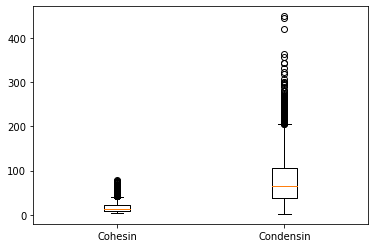

In [6]:
run("both")

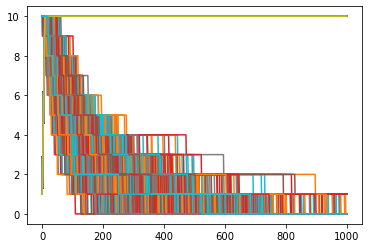

[('Cohesin', 76.9388), ('Condensin', 320.4508)]


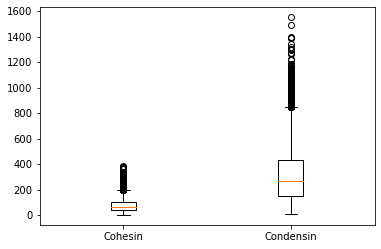

In [7]:
run("both_0.2")

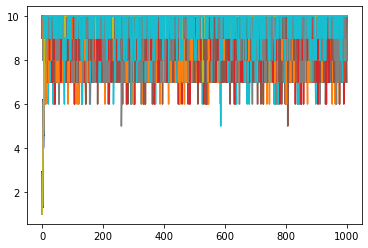

[('Cohesin', 4.466346153846154), ('Condensin', 4.893672406888266)]


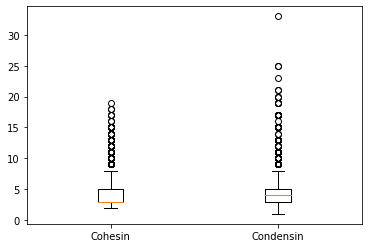

In [8]:
run("both_d_0.5")